In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')

# 5.1
#### For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [2]:
bajaj=pd.read_csv('BAJAJELEC.csv')

In [3]:
daily_mean=np.mean(bajaj['Close Price'].pct_change())#daily returns
daily_std=np.std(bajaj['Close Price'].pct_change())
annual_mean= daily_mean * 252
annual_volatility=daily_std * np.sqrt(252)
print('\033[1m' + 'The Daily mean value is ' + '\033[0m' + str(daily_mean))
print('\033[1m' + 'The Daily standard deviation is ' + '\033[0m' + str(daily_std) + '\n')
print('\033[1m' + 'The Mean expected annual return is ' + '\033[0m' + str(annual_mean))
print('\033[1m' + 'The annual volatility is  ' + '\033[0m' + str(annual_volatility))


The Daily mean value is 0.0012541792961627196
The Daily standard deviation is 0.025323948340995717

The Mean expected annual return is 0.31605318263300536
The annual volatility is  0.4020052171471283


# 5.2 
#### Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

## Portfolio variance is a measure of the dispersion of returns of a portfolio. It is the aggregate of the actual returns of a given portfolio over a set period of time.

In [4]:
ajanta=pd.read_csv('AJANTPHARM.csv') #Mid Cap
pnb=pd.read_csv('PNB.csv')# Mid Cap
reliance=pd.read_csv('RELIANCE.csv')#Large Cap
bajaj=pd.read_csv('BAJAJELEC.csv')#Small Cap
jk=pd.read_csv('JKLAKSHMI.csv')#Small Cap


In [5]:
reliance=reliance[reliance.Series == 'EQ']

In [6]:
df=pd.DataFrame() #To store all the close price of the stocks
df['ajanta']=ajanta['Close Price']
df['pnb']=pnb['Close Price']
df['reliance']=reliance['Close Price']
df['bajaj']=bajaj['Close Price']
df['jk']=jk['Close Price']

To calculate the portfolio variance of securities in a portfolio, multiply the squared weight of each security by the corresponding variance of the security and add two multiplied by the weighted average of the securities multiplied by the covariance between the securities.

To calculate the variance of a portfolio with two assets, multiply the square of the weighting of the first asset by the variance of the asset and add it to the square of the weight of the second asset multiplied by the variance of the second asset. Next, add the resulting value to two multiplied by the weights of the first and second assets multiplied by the covariance of the two assets.

(Courtesy:Investopedia)

In [7]:
returns=df.pct_change()#daily returns

In [8]:
daily_mean=returns.mean()
cov=returns.cov()

In [9]:
weights=[0.2,0.2,0.2,0.2,0.2]

In [10]:
annual_return=np.sum(daily_mean * weights) * 252
annual_volatility=np.dot(np.transpose(weights),np.dot(cov,weights)) * np.sqrt(252)
print('\033[1m' + 'The Annual return of portfolio is ' + '\033[0m' + str(annual_return))
print('\033[1m' + 'The annual volatility of portfolio is  ' + '\033[0m' + str(annual_volatility))

The Annual return of portfolio is -0.034204477355243776
The annual volatility of portfolio is  0.0032799747018846252


# 5.3
#### Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [11]:
num_iteration=20000
values = np.zeros((8,num_iteration)) # to store the values of annual return and volatility for different weights
for i in range(num_iteration):
    weights=np.random.random(5)
    weights/=np.sum(weights)
    annual_return=np.sum(daily_mean * weights) * 252
    annual_volatility=np.dot(np.transpose(weights),np.dot(cov,weights)) * np.sqrt(252)
    
    values[0,i]=annual_return
    values[1,i]=annual_volatility
    values[2,i]=annual_return/annual_volatility
    for j in range(len(weights)):
        values[j+3,i]=weights[j]

    

In [12]:
df2=pd.DataFrame(np.transpose(values),columns=['return','STD','Sharpe Ratio','ajanta','pnb','reliance','bajaj','jk'])

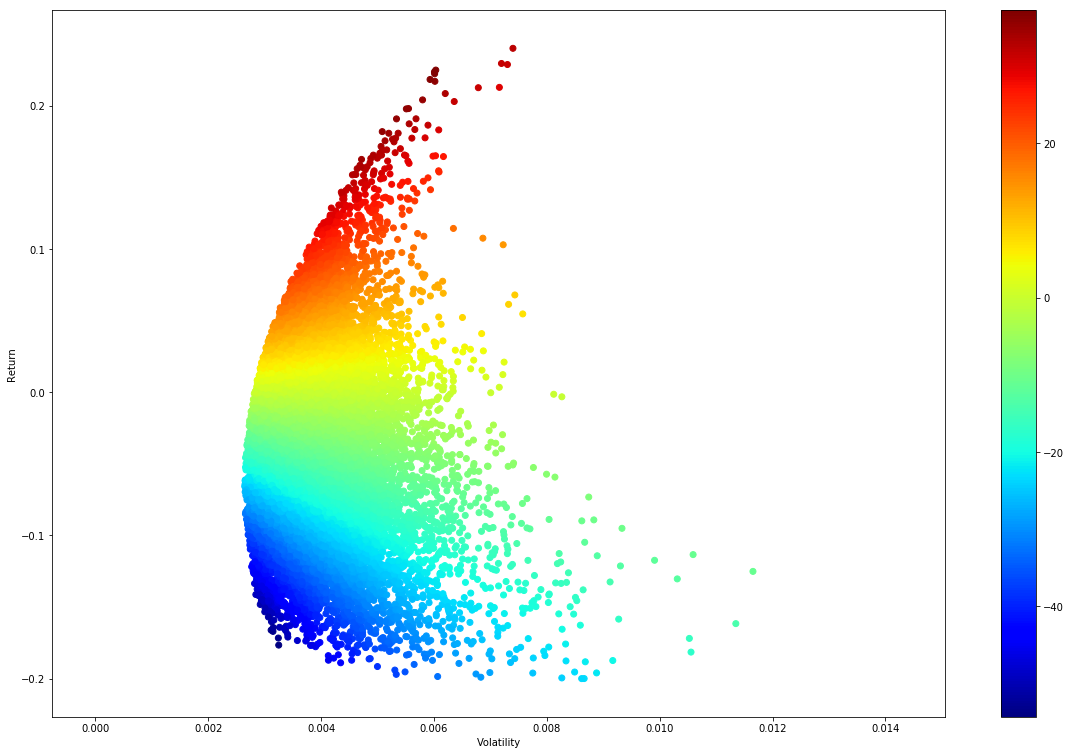

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(df2['STD'],df2['return'],c=df2['Sharpe Ratio'],cmap='jet')
plt.colorbar()

# 5.4 
#### Mark the 2 portfolios where -
##### Portfolio 1 - The Sharpe ratio is the highest

##### Portfolio 2 - The volatility is the lowest. 

In [14]:
max_sharpe=df2.iloc[df2['Sharpe Ratio'].idxmax()] # Finding the row of highest sharpe and lowest volatility
min_volatility=df2.iloc[df2['STD'].idxmin()]

In [16]:
print(max_sharpe)

return           0.224934
STD              0.006032
Sharpe Ratio    37.289405
ajanta           0.014976
pnb              0.009145
reliance         0.264444
bajaj            0.669618
jk               0.041818
Name: 5081, dtype: float64


This is the **weight** of the stocks in our portfolio which we can use for **maximum sharpe**.

In [17]:
print(min_volatility)

return          -0.065740
STD              0.002647
Sharpe Ratio   -24.837936
ajanta           0.295932
pnb              0.026564
reliance         0.133175
bajaj            0.147099
jk               0.397230
Name: 2078, dtype: float64


This is the **weight** of the stocks in our portfolio which we can use for **minimum volatility**.

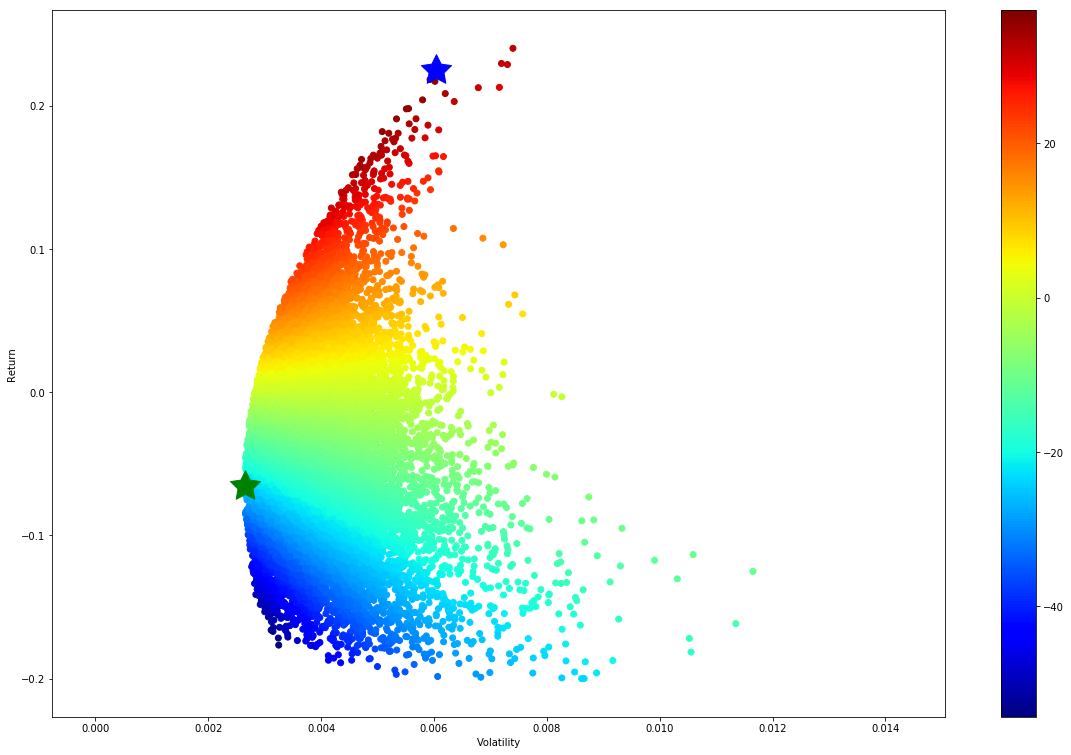

In [15]:
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(df2['STD'],df2['return'],c=df2['Sharpe Ratio'],cmap='jet')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='b',s=1000)# Blue Star = maximum Sharpe Retio
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='g',s=1000) # Green star=minimum variance